In [1]:
pip install opencv-contrib-python

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\asus\Python Data Science\Image Processing\Image_Processing\Scripts\python.exe -m pip install --upgrade pip' command.


In [2]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\asus\Python Data Science\Image Processing\Image_Processing\Scripts\python.exe -m pip install --upgrade pip' command.


In [ ]:
pip install matplotlib

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
print(cv2.__version__)

4.9.0


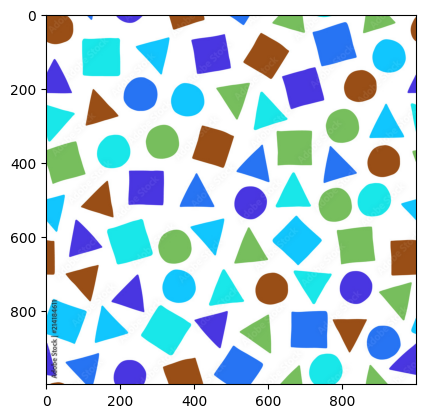

In [31]:
img = cv2.imread("E:/CodeBase/GitHub/Image_Processing_and_Computer_Vision/1. Basic Image Processing/Shapes_Shapes.jpg")
plt.imshow(img)

Gray scale conversion is done to reduce the complexity of the image by converting it to same flat color. This supports processing and learning.

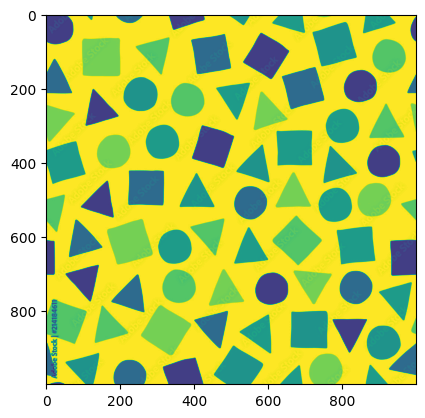

In [32]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray)

Blurring further simplify the image by smoothing. In here 5 x 5 kernel is applied across the image matrix and pixel averaging is done.  After this hence the pixel count reduces, clarity of the image drops by mathematical representation of the image becomes more simpler, which is needed for the processing.

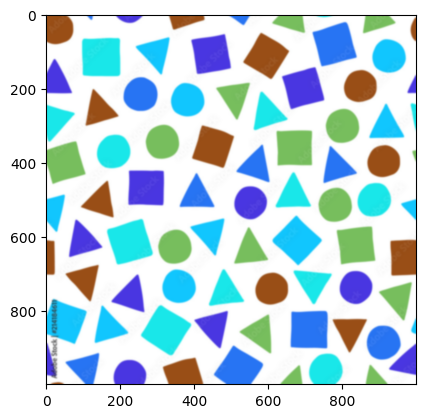

In [33]:
blurred = cv2.GaussianBlur(img, (9, 9), 0)
plt.imshow(blurred)

Canny edge detection identifies areas in the image where there are rapid changes in intensity, which often correspond to edges or boundaries between different objects. Pixel intensity ranges between 50- 150 has been considered to apply the algorithm. This will superimpose the edges and bounderies making it easy to understand for the computer

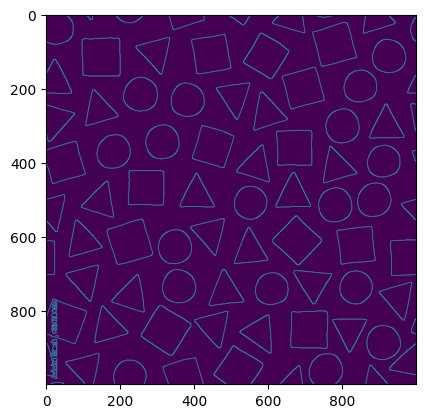

In [34]:
edges = cv2.Canny(blurred, 50, 150)
plt.imshow(edges)   

Thresholding simplifies an image by dividing it into just two colors [binalize]: black and white. If a pixel is darker than a medium gray (127), it becomes totally black (0); otherwise, it becomes totally white (255). It's like creating a simplified map where only certain details stand out, making it easier to focus on specific parts of the image.

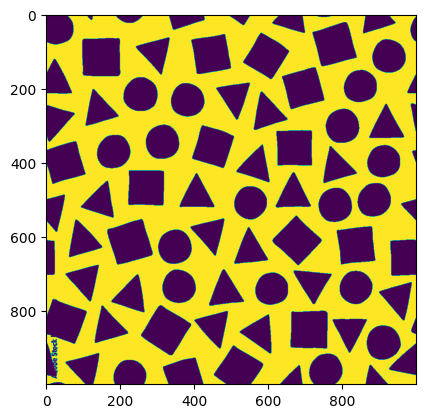

In [35]:
_, thresh = cv2.threshold(gray, 225, 255, cv2.THRESH_BINARY)
plt.imshow(thresh) 

Coutours are outlines drawn surrunding the shapes. It`s mainly used for shape analysis. cv2.RETR_EXTERNAL means consider only the external aspect of the object, not considering the inside.cv2.
CHAIN_APPROX_SIMPLE compresses horizontal, vertical, and diagonal  lines and provide a simple averagred representation.

In [36]:
# Find contours in the binary image
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [37]:
# Draw contours on the original image
cv2.drawContours(img, contours, -1, (0, 255, 0), 2)

array([[[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [255, 255, 255],
        [  0, 255,   0],
        [  0, 255,   0]],

       ...,

       [[  0, 255,   0],
        [  0, 255,   0],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]]

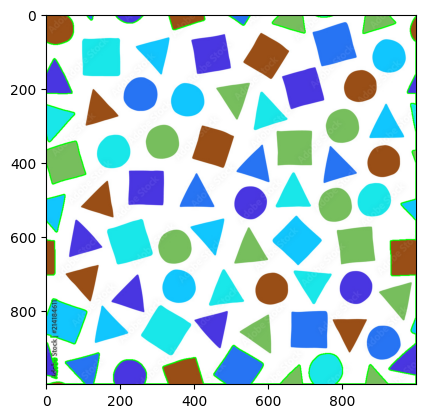

In [38]:
plt.imshow(img) 

In [39]:
def find_triangles(image_path):
    # Read the image
    img = cv2.imread(image_path)

    # Convert the image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Apply GaussianBlur to reduce noise and help contour detection
    blurred = cv2.GaussianBlur(gray, (7, 7), 0)

    # Use Canny edge detection to find edges in the image
    edges = cv2.Canny(blurred, 30, 150)

    # Find contours in the edged image
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Iterate through the contours
    for contour in contours:
        # Approximate the contour to a polygon
        epsilon = 0.04 * cv2.arcLength(contour, True)
        approx = cv2.approxPolyDP(contour, epsilon, True)

        # If the polygon has 3 vertices, it's a triangle
        if len(approx) == 4:
            # Draw a bounding box around the triangle (in red)
            x, y, w, h = cv2.boundingRect(contour)
            cv2.rectangle(img, (x, y), (x + w, y + h), (0, 0, 255), 2)

    # Display the result
    cv2.imshow('Triangles with Bounding Boxes', img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [40]:
# Replace 'your_image_path.jpg' with the path to your image
find_triangles('picture.jpg')

error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


Epsilon as deciding how much you care about the tiny details of the shape. Smaller epsilon means you really care about the details, while larger epsilon means you're okay with a simpler, more generalized shape. archLenth method calculate the total lenth of the surface contour and 4% of is applied for the Epsilon calculation.

True, denotes, we are looking for closed shapes, not open. appoxPolyDP method derives information of all poligon shapes, which satisfies the specified epsilon criteria.

Henceforth, via a condition we can check poligons having 3 contour lines connected as traingles. If you make it 4, it will look for squares.